In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline  import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.dates as mdate
from matplotlib import rc 
rc('font',family='NanumGothic')



read=pd.read_csv('/home/hyuksu/projects/ml/project/데이터/FIN_DATA_v5.csv')
read

,DATE_YM,STATES,SIZE,PRICE_MEDIAN,COUNTS,PRICE_MEDIAN_LAG_1,PRICE_MEDIAN_LAG_2,PRICE_MEDIAN_LAG_3,CPI,CPI_YOY,...,BASE_RATE_LAG_2,CPI_YOY_LAG_2,REAL_RATE_LAG_2,HOUSE_RATE_LAG_2,CPI_LAG_3,BASE_RATE_LAG_3,CPI_YOY_LAG_3,REAL_RATE_LAG_3,HOUSE_RATE_LAG_3,VARIABLED
0,201504,강남구,대형,128750.0,246,130000.0,125000.0,132750.0,94.625,0.436241,...,1.990,0.645882,1.344118,3.24,94.643,1.990,0.974074,1.015926,3.34,-0.030132
1,201505,강남구,대형,133000.0,204,128750.0,130000.0,125000.0,94.890,0.552088,...,1.820,0.470511,1.349489,2.97,94.587,1.990,0.645882,1.344118,3.24,0.064000
2,201506,강남구,대형,131000.0,183,133000.0,128750.0,130000.0,94.909,0.701341,...,1.730,0.436241,1.293759,2.81,94.596,1.820,0.470511,1.349489,2.97,0.007692
3,201507,강남구,대형,139250.0,176,131000.0,133000.0,128750.0,95.080,0.735279,...,1.740,0.552088,1.187912,3.06,94.625,1.730,0.436241,1.293759,2.81,0.081553
4,201508,강남구,대형,135000.0,157,139250.0,131000.0,133000.0,95.213,0.700151,...,1.570,0.701341,0.868659,3.01,94.890,1.740,0.552088,1.187912,3.06,0.015038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,202506,중구,중형,120000.0,86,134500.0,120000.0,125000.0,116.310,2.169712,...,2.769,2.078765,0.690235,3.98,116.290,2.754,2.053532,0.700468,4.17,-0.040000
4568,202507,중구,중형,115000.0,20,120000.0,134500.0,120000.0,116.520,2.094103,...,2.738,1.901840,0.836160,3.87,116.380,2.769,2.078765,0.690235,3.98,-0.041667
4569,202508,중구,중형,129000.0,25,115000.0,120000.0,134500.0,116.450,1.667540,...,2.520,2.169712,0.350288,3.93,116.270,2.738,1.901840,0.836160,3.87,-0.040892
4570,202509,중구,중형,137500.0,69,129000.0,115000.0,120000.0,117.060,2.102050,...,2.500,2.094103,0.405897,3.96,116.310,2.520,2.169712,0.350288,3.93,0.145833


In [2]:
read['DATE_YM']=pd.to_datetime(read['DATE_YM'].astype(str),format='%Y%m')
y=read['VARIABLED']
x=read.drop(columns=['VARIABLED'])




In [3]:
xa=read.drop(columns=['DATE_YM','VARIABLED'])


In [4]:
xa

,STATES,SIZE,PRICE_MEDIAN,COUNTS,PRICE_MEDIAN_LAG_1,PRICE_MEDIAN_LAG_2,PRICE_MEDIAN_LAG_3,CPI,CPI_YOY,BASE_RATE,...,CPI_LAG_2,BASE_RATE_LAG_2,CPI_YOY_LAG_2,REAL_RATE_LAG_2,HOUSE_RATE_LAG_2,CPI_LAG_3,BASE_RATE_LAG_3,CPI_YOY_LAG_3,REAL_RATE_LAG_3,HOUSE_RATE_LAG_3
0,강남구,대형,128750.0,246,130000.0,125000.0,132750.0,94.625,0.436241,1.730,...,94.587,1.990,0.645882,1.344118,3.24,94.643,1.990,0.974074,1.015926,3.34
1,강남구,대형,133000.0,204,128750.0,130000.0,125000.0,94.890,0.552088,1.740,...,94.596,1.820,0.470511,1.349489,2.97,94.587,1.990,0.645882,1.344118,3.24
2,강남구,대형,131000.0,183,133000.0,128750.0,130000.0,94.909,0.701341,1.570,...,94.625,1.730,0.436241,1.293759,2.81,94.596,1.820,0.470511,1.349489,2.97
3,강남구,대형,139250.0,176,131000.0,133000.0,128750.0,95.080,0.735279,1.480,...,94.890,1.740,0.552088,1.187912,3.06,94.625,1.730,0.436241,1.293759,2.81
4,강남구,대형,135000.0,157,139250.0,131000.0,133000.0,95.213,0.700151,1.490,...,94.909,1.570,0.701341,0.868659,3.01,94.890,1.740,0.552088,1.187912,3.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,중구,중형,120000.0,86,134500.0,120000.0,125000.0,116.310,2.169712,2.520,...,116.380,2.769,2.078765,0.690235,3.98,116.290,2.754,2.053532,0.700468,4.17
4568,중구,중형,115000.0,20,120000.0,134500.0,120000.0,116.520,2.094103,2.500,...,116.270,2.738,1.901840,0.836160,3.87,116.380,2.769,2.078765,0.690235,3.98
4569,중구,중형,129000.0,25,115000.0,120000.0,134500.0,116.450,1.667540,2.506,...,116.310,2.520,2.169712,0.350288,3.93,116.270,2.738,1.901840,0.836160,3.87
4570,중구,중형,137500.0,69,129000.0,115000.0,120000.0,117.060,2.102050,2.526,...,116.520,2.500,2.094103,0.405897,3.96,116.310,2.520,2.169712,0.350288,3.93


In [5]:
str_type = xa.select_dtypes(include=['object', 'category']).columns.tolist()
num_type = xa.select_dtypes(exclude=['object', 'category']).columns.tolist()

pred = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(
            handle_unknown='ignore',
            sparse_output=False
        ), str_type),
        ('num', 'passthrough', num_type)
    ]
)

gbr = Pipeline(
    steps=[
        ('pre', pred),
        ('gbr', GradientBoostingRegressor(
            n_estimators=200,
            learning_rate=0.05,
            max_depth=3,
            random_state=42
        ))
    ]
)


In [6]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor



In [7]:
gbr = Pipeline(
    steps=[
        ('pre', pred),
        ('gbr', GradientBoostingRegressor(
            n_estimators=200,
            learning_rate=0.05,
            max_depth=3,
            random_state=42
        ))
    ]
)

In [8]:
lasso = Pipeline(
    steps=[
        ('pre', pred),
        ('lasso', Lasso(alpha=0.2))
    ]
)


In [9]:
ridge = Pipeline(
    steps=[
        ('pre', pred),
        ('ridge', Ridge(alpha=0.2))
    ]
)


In [10]:
svr = Pipeline(
    steps=[
        ('pre', pred),
        ('svr', SVR(
            kernel='rbf',
            C=1.0,
            gamma='scale',
            epsilon=0.1
        ))
    ]
)


In [11]:
ada = Pipeline(
    steps=[
        ('pre', pred),
        ('ada', AdaBoostRegressor(
            n_estimators=200,
            learning_rate=0.05,
            random_state=42
        ))
    ]
)


In [12]:
num=int(len(x)*0.7)

train_x,test_x=xa.loc[:num],xa.loc[num:]
train_y,test_y=y.loc[:num],y.loc[num:]
gbr.fit(train_x,train_y)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pre', ...), ('gbr', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('onehot', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains s

In [13]:
lasso.fit(train_x,train_y)




,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pre', ...), ('lasso', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('onehot', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains

In [14]:
ridge.fit(train_x,train_y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pre', ...), ('ridge', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('onehot', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains

In [15]:
svr.fit(train_x,train_y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pre', ...), ('svr', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('onehot', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains s

In [16]:
ada.fit(train_x,train_y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pre', ...), ('ada', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('onehot', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains s

In [17]:
gbr.score(train_x,train_y)

0.9582729155390827

In [18]:
gbr.score(test_x,test_y)

0.8795957213676998

In [19]:
con=read['STATES']=='강남구'
data=read.loc[con]
data

,DATE_YM,STATES,SIZE,PRICE_MEDIAN,COUNTS,PRICE_MEDIAN_LAG_1,PRICE_MEDIAN_LAG_2,PRICE_MEDIAN_LAG_3,CPI,CPI_YOY,...,BASE_RATE_LAG_2,CPI_YOY_LAG_2,REAL_RATE_LAG_2,HOUSE_RATE_LAG_2,CPI_LAG_3,BASE_RATE_LAG_3,CPI_YOY_LAG_3,REAL_RATE_LAG_3,HOUSE_RATE_LAG_3,VARIABLED
0,2015-04-01,강남구,대형,128750.0,246,130000.0,125000.0,132750.0,94.625,0.436241,...,1.990,0.645882,1.344118,3.24,94.643,1.990,0.974074,1.015926,3.34,-0.030132
1,2015-05-01,강남구,대형,133000.0,204,128750.0,130000.0,125000.0,94.890,0.552088,...,1.820,0.470511,1.349489,2.97,94.587,1.990,0.645882,1.344118,3.24,0.064000
2,2015-06-01,강남구,대형,131000.0,183,133000.0,128750.0,130000.0,94.909,0.701341,...,1.730,0.436241,1.293759,2.81,94.596,1.820,0.470511,1.349489,2.97,0.007692
3,2015-07-01,강남구,대형,139250.0,176,131000.0,133000.0,128750.0,95.080,0.735279,...,1.740,0.552088,1.187912,3.06,94.625,1.730,0.436241,1.293759,2.81,0.081553
4,2015-08-01,강남구,대형,135000.0,157,139250.0,131000.0,133000.0,95.213,0.700151,...,1.570,0.701341,0.868659,3.01,94.890,1.740,0.552088,1.187912,3.06,0.015038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,2025-06-01,강남구,중형,290000.0,233,295000.0,312000.0,241000.0,116.310,2.169712,...,2.769,2.078765,0.690235,3.98,116.290,2.754,2.053532,0.700468,4.17,0.203320
377,2025-07-01,강남구,중형,267500.0,142,290000.0,295000.0,312000.0,116.520,2.094103,...,2.738,1.901840,0.836160,3.87,116.380,2.769,2.078765,0.690235,3.98,-0.142628
378,2025-08-01,강남구,중형,172500.0,34,267500.0,290000.0,295000.0,116.450,1.667540,...,2.520,2.169712,0.350288,3.93,116.270,2.738,1.901840,0.836160,3.87,-0.415254
379,2025-09-01,강남구,중형,266250.0,76,172500.0,267500.0,290000.0,117.060,2.102050,...,2.500,2.094103,0.405897,3.96,116.310,2.520,2.169712,0.350288,3.93,-0.081897


In [20]:
y_true=data['VARIABLED']
x_data=data.drop(columns=['VARIABLED','DATE_YM'])

In [21]:
pre=gbr.predict(x_data)
pre

array([-1.60060301e-02,  7.06470911e-02,  3.87965202e-02,  9.62392250e-02,
       -1.04555017e-03,  2.21817850e-02, -7.11931579e-03,  2.47981009e-02,
        3.40215247e-02, -1.04555017e-03,  6.45483847e-02,  7.13703058e-03,
        7.21013527e-02, -2.13086920e-02,  1.01012506e-03, -1.81577430e-02,
        3.28220914e-02,  4.02343024e-03,  3.98608154e-03, -1.84975960e-02,
        6.37060474e-02,  2.89313790e-02,  6.37060474e-02,  2.32454189e-02,
        4.45987246e-02,  2.32454189e-02,  2.32454189e-02,  2.32454189e-02,
        2.32454189e-02,  2.32454189e-02,  3.75870720e-02,  4.43369229e-02,
        3.69617907e-02,  1.94895220e-02,  4.46447343e-02,  6.32864752e-02,
        7.79687422e-02,  1.20759499e-02,  4.76176863e-02,  3.94382755e-02,
        9.01044632e-02,  1.98141541e-02, -6.43864826e-02,  6.10876168e-02,
       -5.13387753e-02,  1.42821815e-01, -5.14316729e-02,  1.64198019e-01,
        6.39596329e-02,  7.46015349e-02,  3.32303927e-02, -5.18659894e-04,
       -5.18659894e-04,  

/home/hyuksu/projects/ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


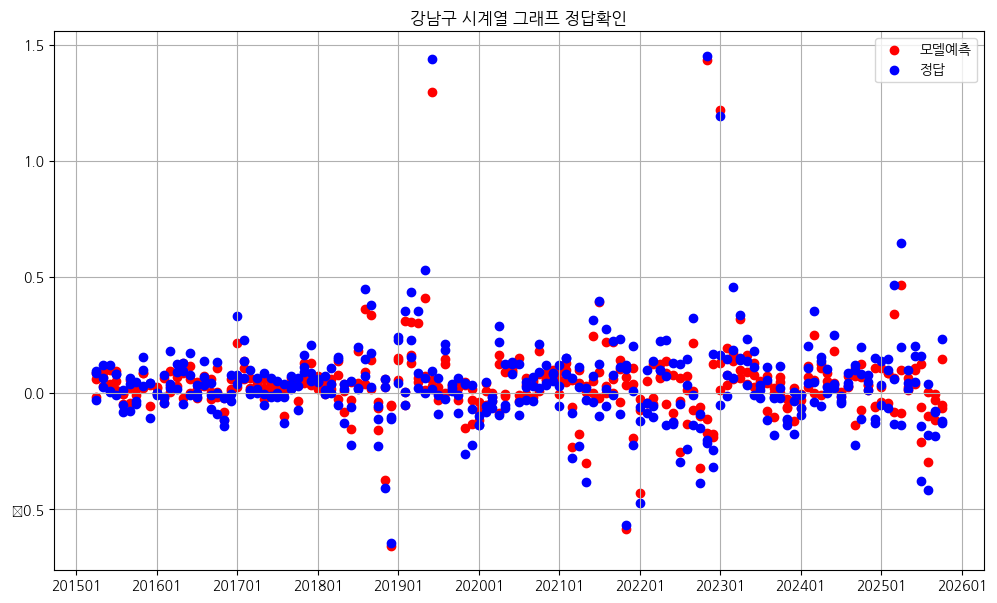

In [22]:

plt.figure(figsize=(12,7))
plt.scatter(data['DATE_YM'],pre,color='red',label='모델예측')
plt.scatter(data['DATE_YM'],y_true,color='blue',label='정답')
plt.title('강남구 시계열 그래프 정답확인')
plt.grid(True)
ax=plt.gca()
ax.xaxis.set_major_locator(mdate.YearLocator())
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y%m'))
plt.legend()
plt.show()

/tmp/ipykernel_73163/1844155081.py:55: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipykernel_73163/1844155081.py:58: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.savefig(
/home/hyuksu/projects/ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


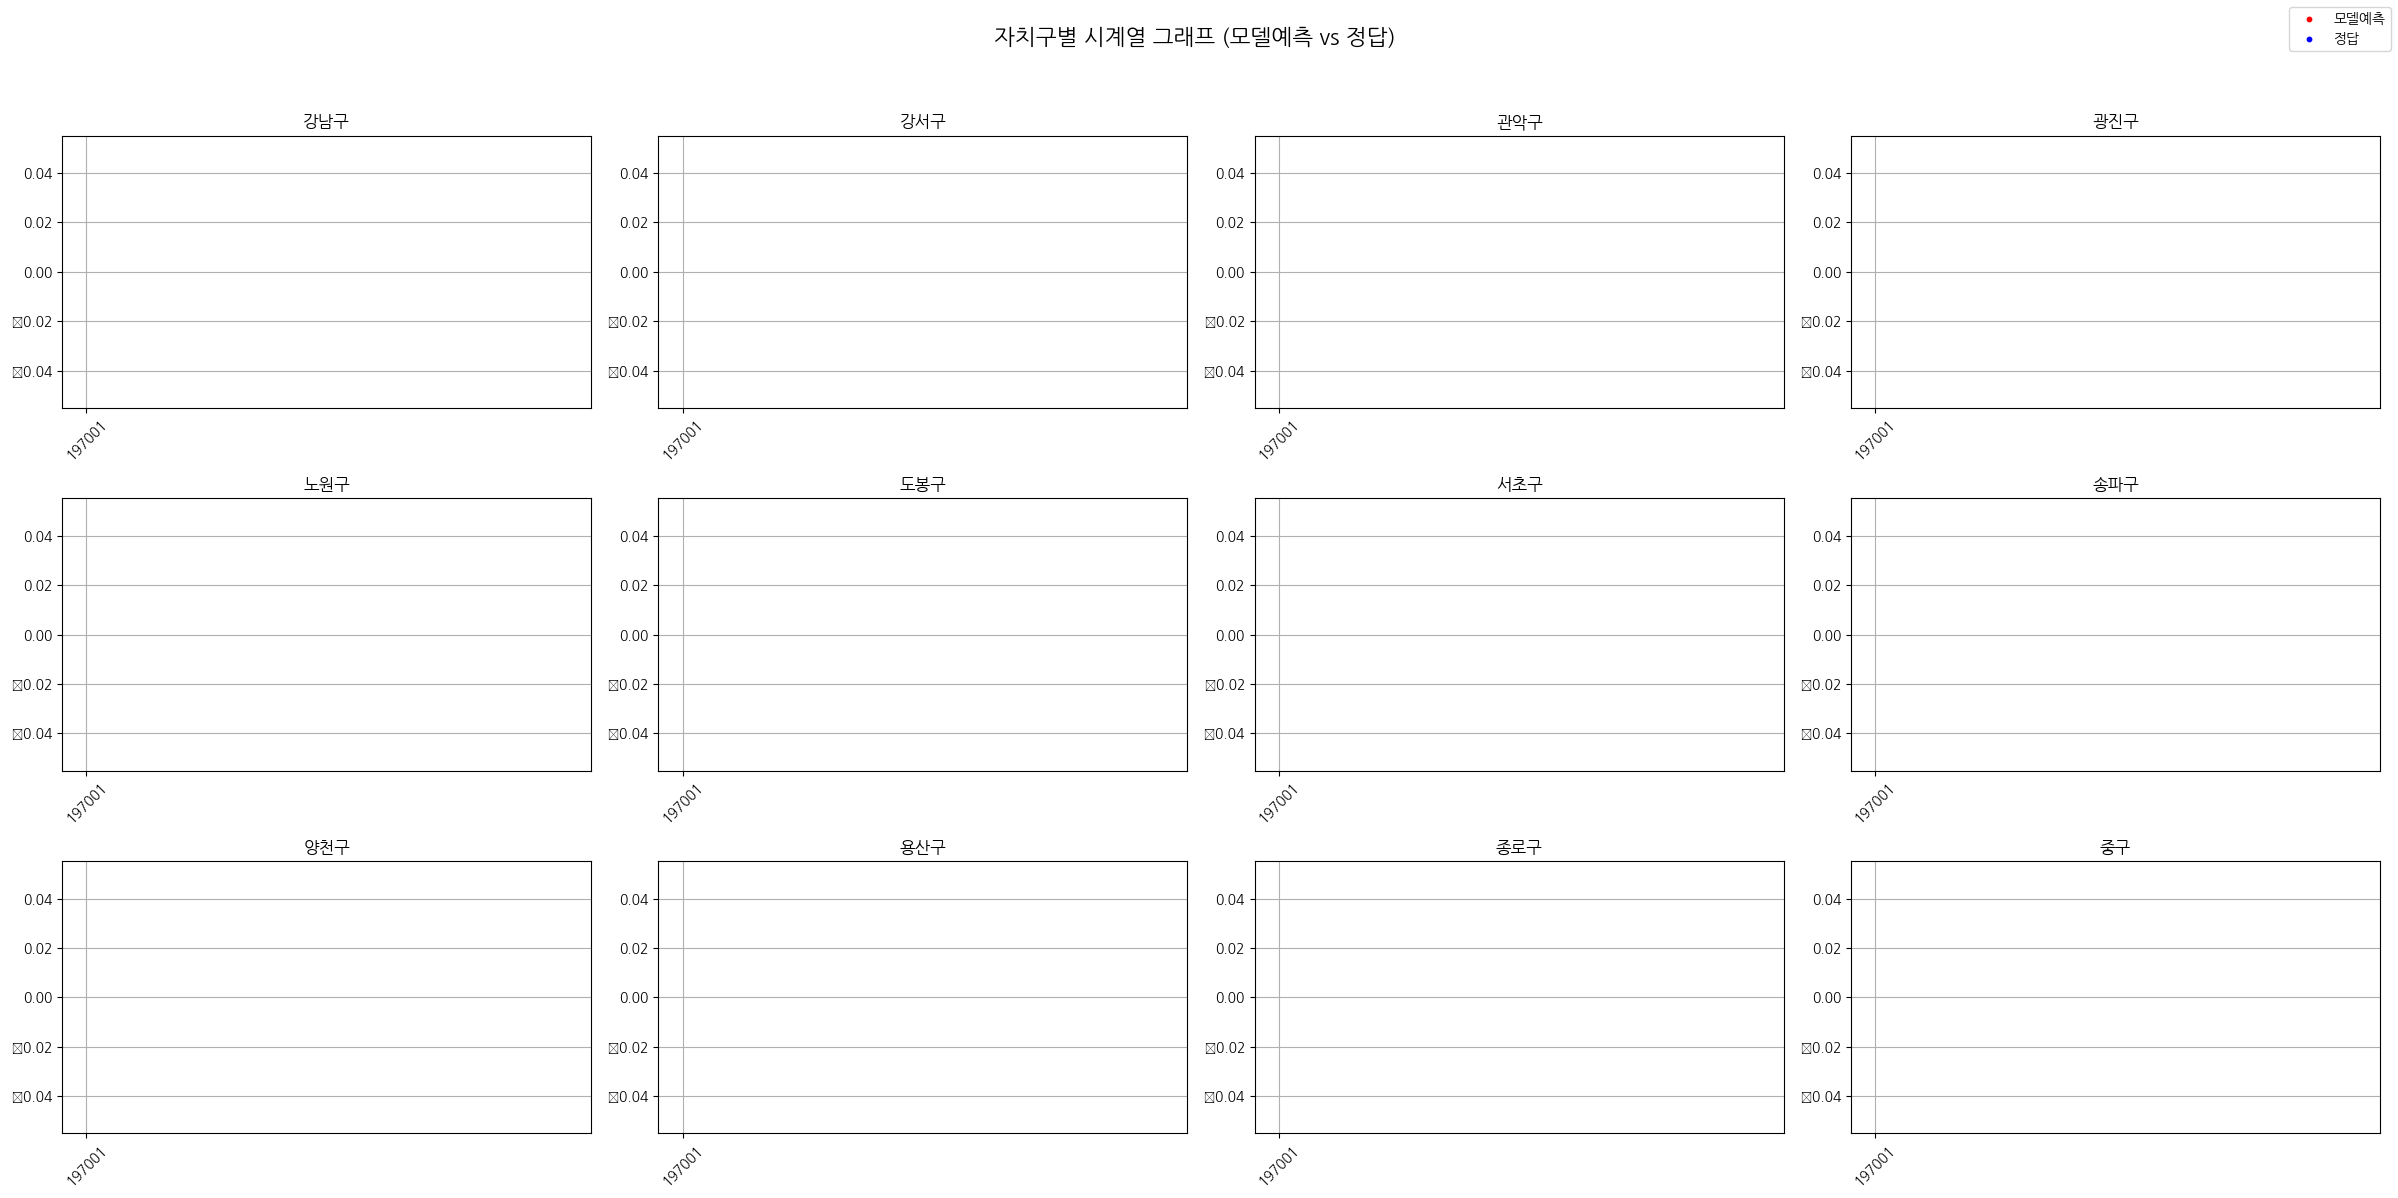

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import pandas as pd
import math
import os



states = sorted(read['STATES'].dropna().unique())
n = len(states)

# 👉 4 x 3 레이아웃 (12개)
cols = 4
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(24, 12))
axes = axes.flatten()

for i, s in enumerate(states):
    ax = axes[i]

    con = read['STATES'] == s
    data = read.loc[con].copy()

    data['DATE_YM'] = pd.to_datetime(
        data['DATE_YM'].astype(str),
        format='%Y%m',
        errors='coerce'
    )

    y_true = data['VARIABLED']
    x_data = data.drop(columns=['VARIABLED', 'DATE_YM'])

    pre = gbr.predict(x_data)

    ax.scatter(data['DATE_YM'], pre, color='red', s=10, label='모델예측')
    ax.scatter(data['DATE_YM'], y_true, color='blue', s=10, label='정답')
    ax.set_title(s)
    ax.grid(True)

    ax.xaxis.set_major_locator(mdate.YearLocator())
    ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y%m'))
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

# 남는 칸 제거 (혹시 STATES가 12개 미만일 때)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 범례는 전체에서 한 번만
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

fig.suptitle('자치구별 시계열 그래프 (모델예측 vs 정답)', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])

#  한 이미지로 저장
fig.savefig(
    "figures/all_states_single_figure.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


In [25]:
read=pd.read_csv('/home/hyuksu/projects/ml/project/데이터/FIN_DATA_v5.csv')

/tmp/ipykernel_73163/1535208249.py:69: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipykernel_73163/1535208249.py:70: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.savefig(
/home/hyuksu/projects/ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


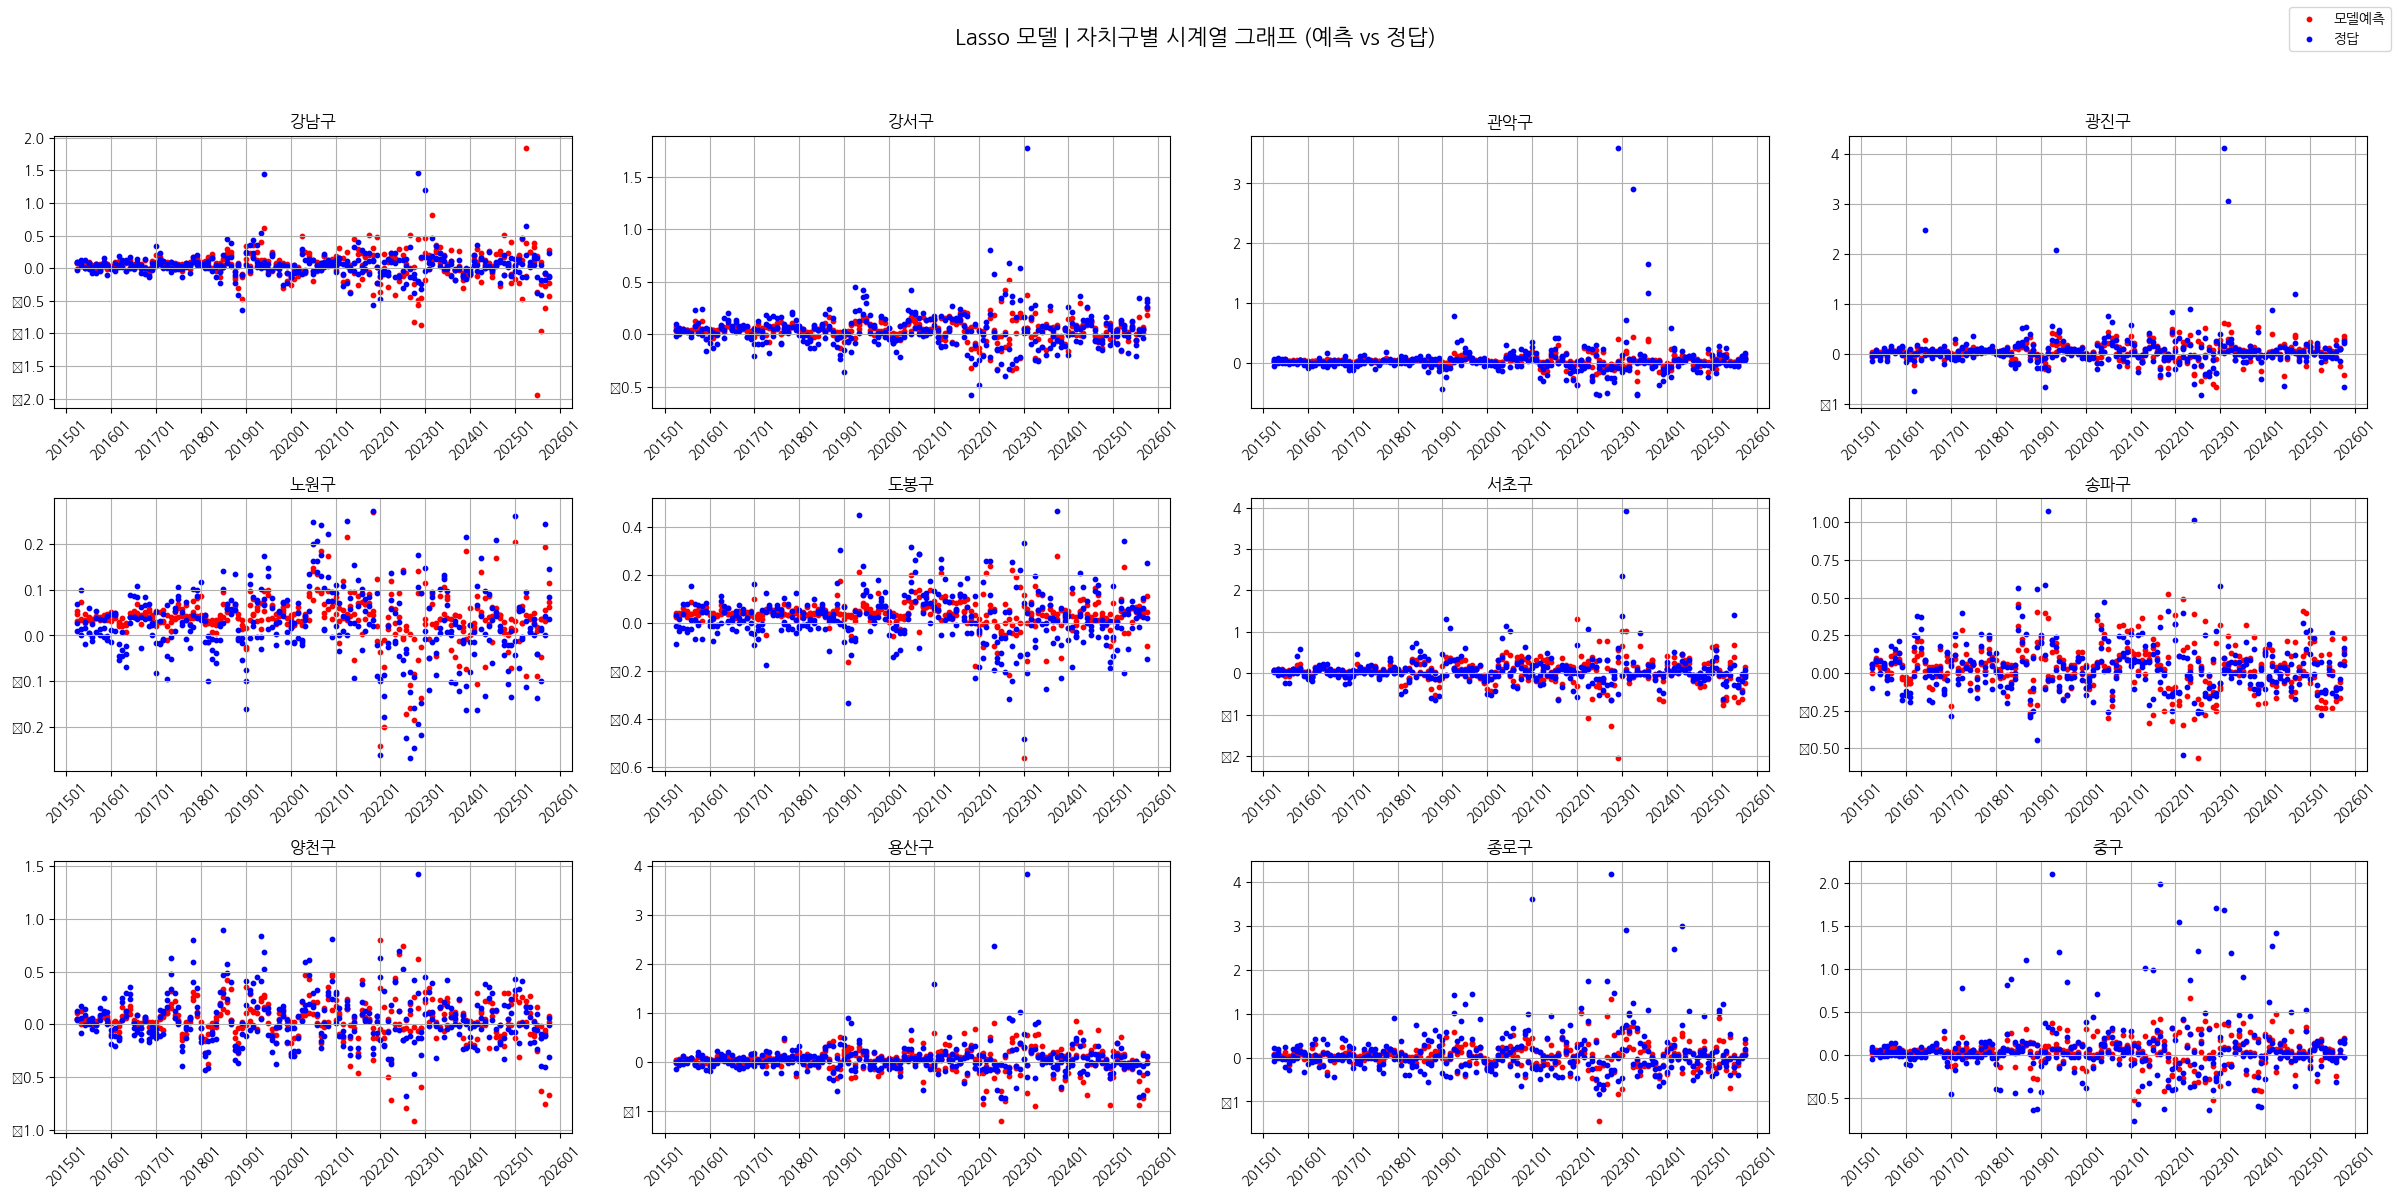

/tmp/ipykernel_73163/1535208249.py:69: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipykernel_73163/1535208249.py:70: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.savefig(
/home/hyuksu/projects/ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


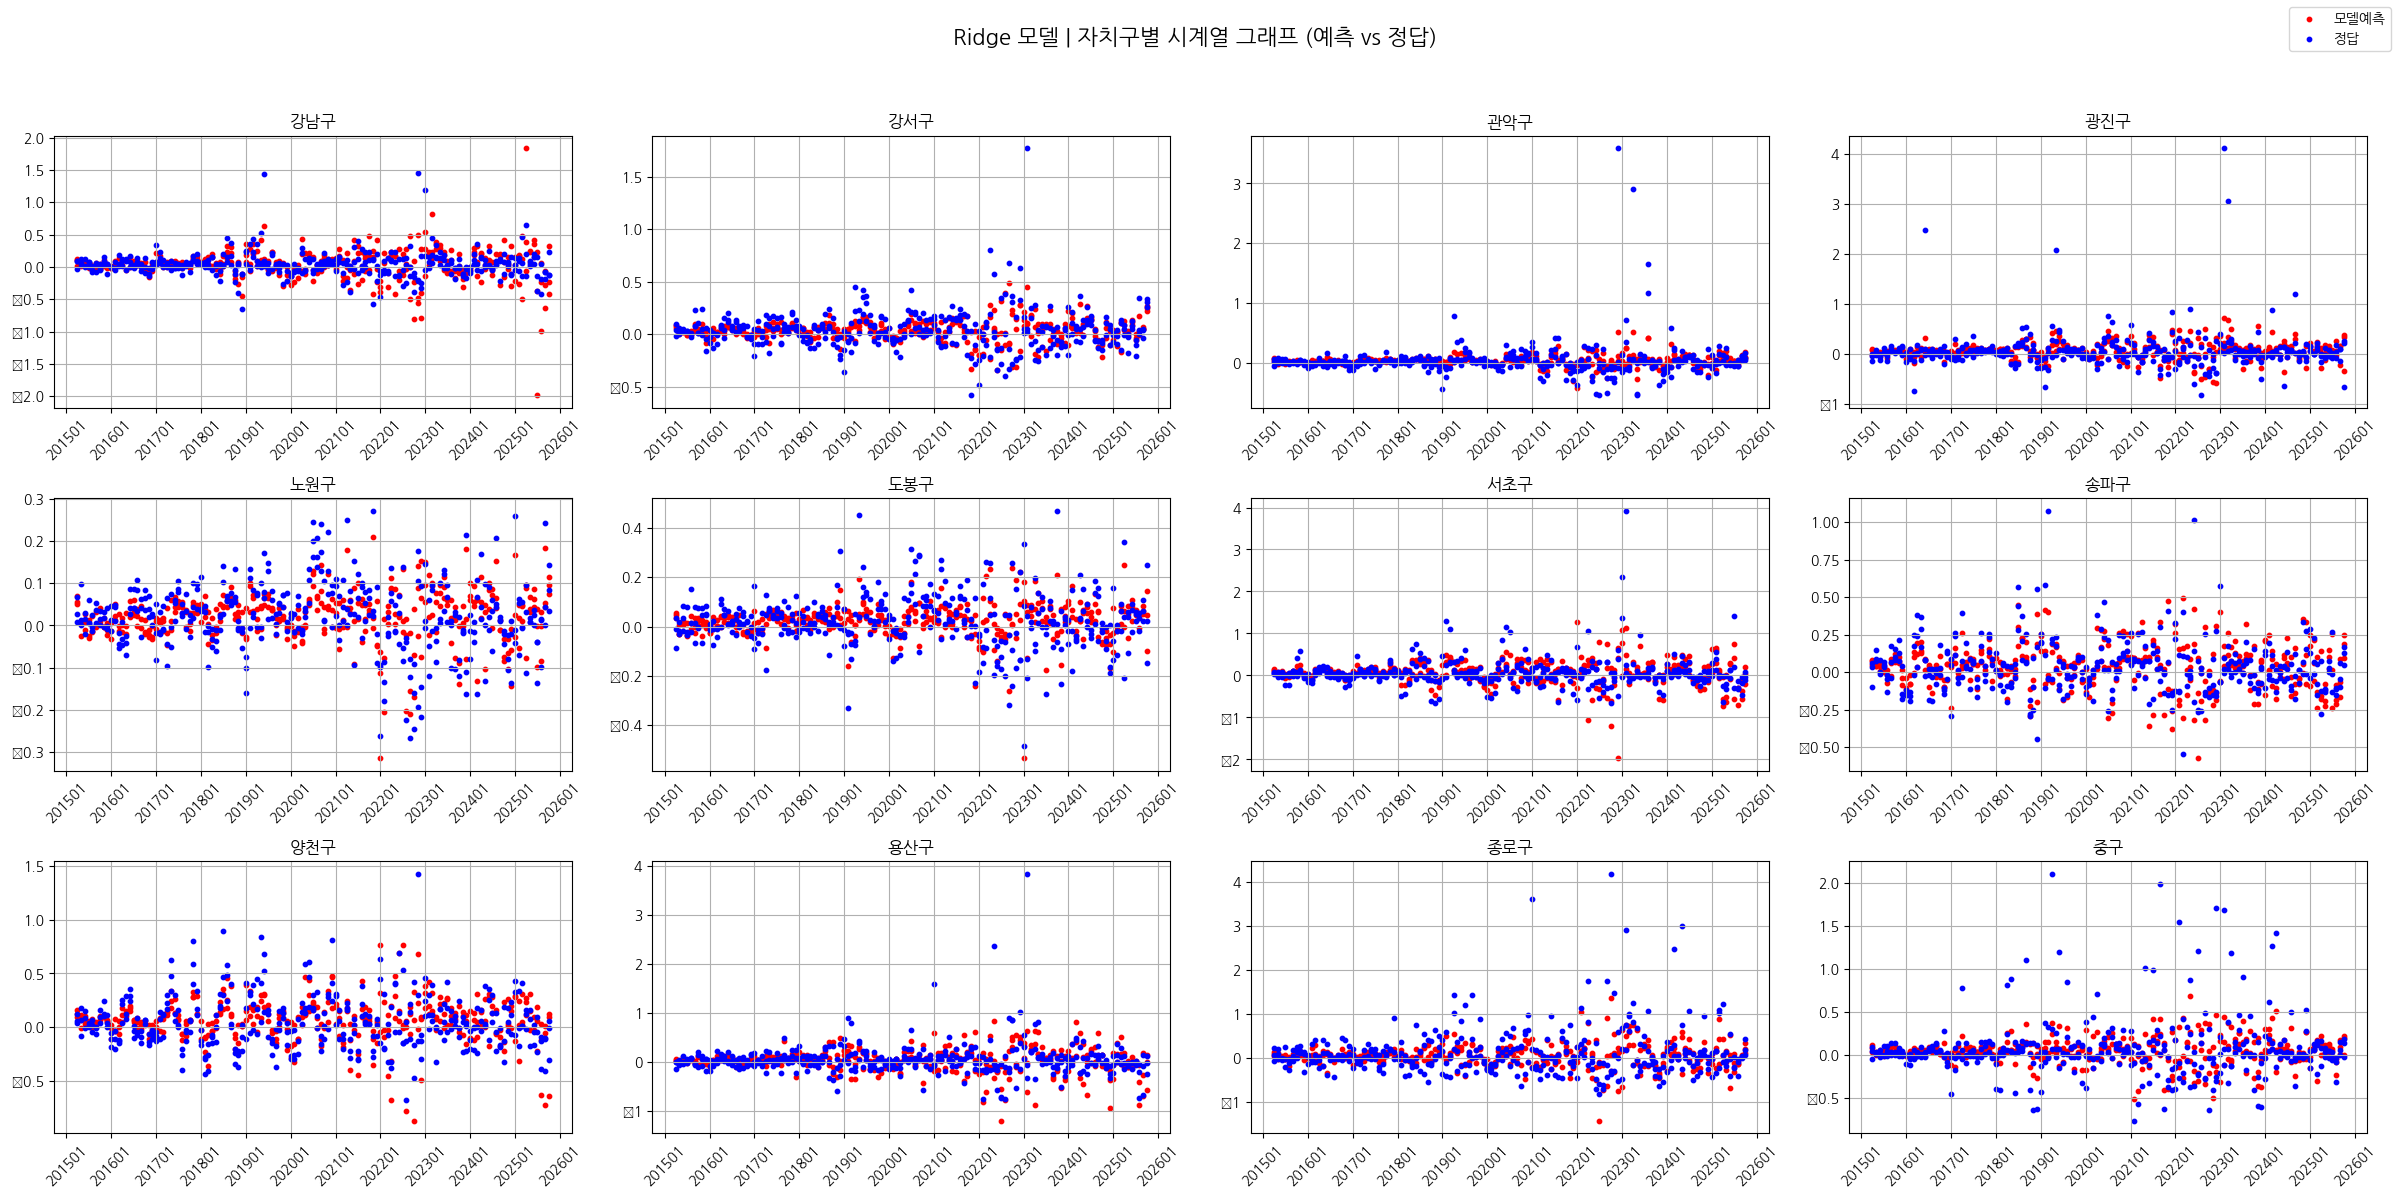

/tmp/ipykernel_73163/1535208249.py:69: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipykernel_73163/1535208249.py:70: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.savefig(
/home/hyuksu/projects/ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


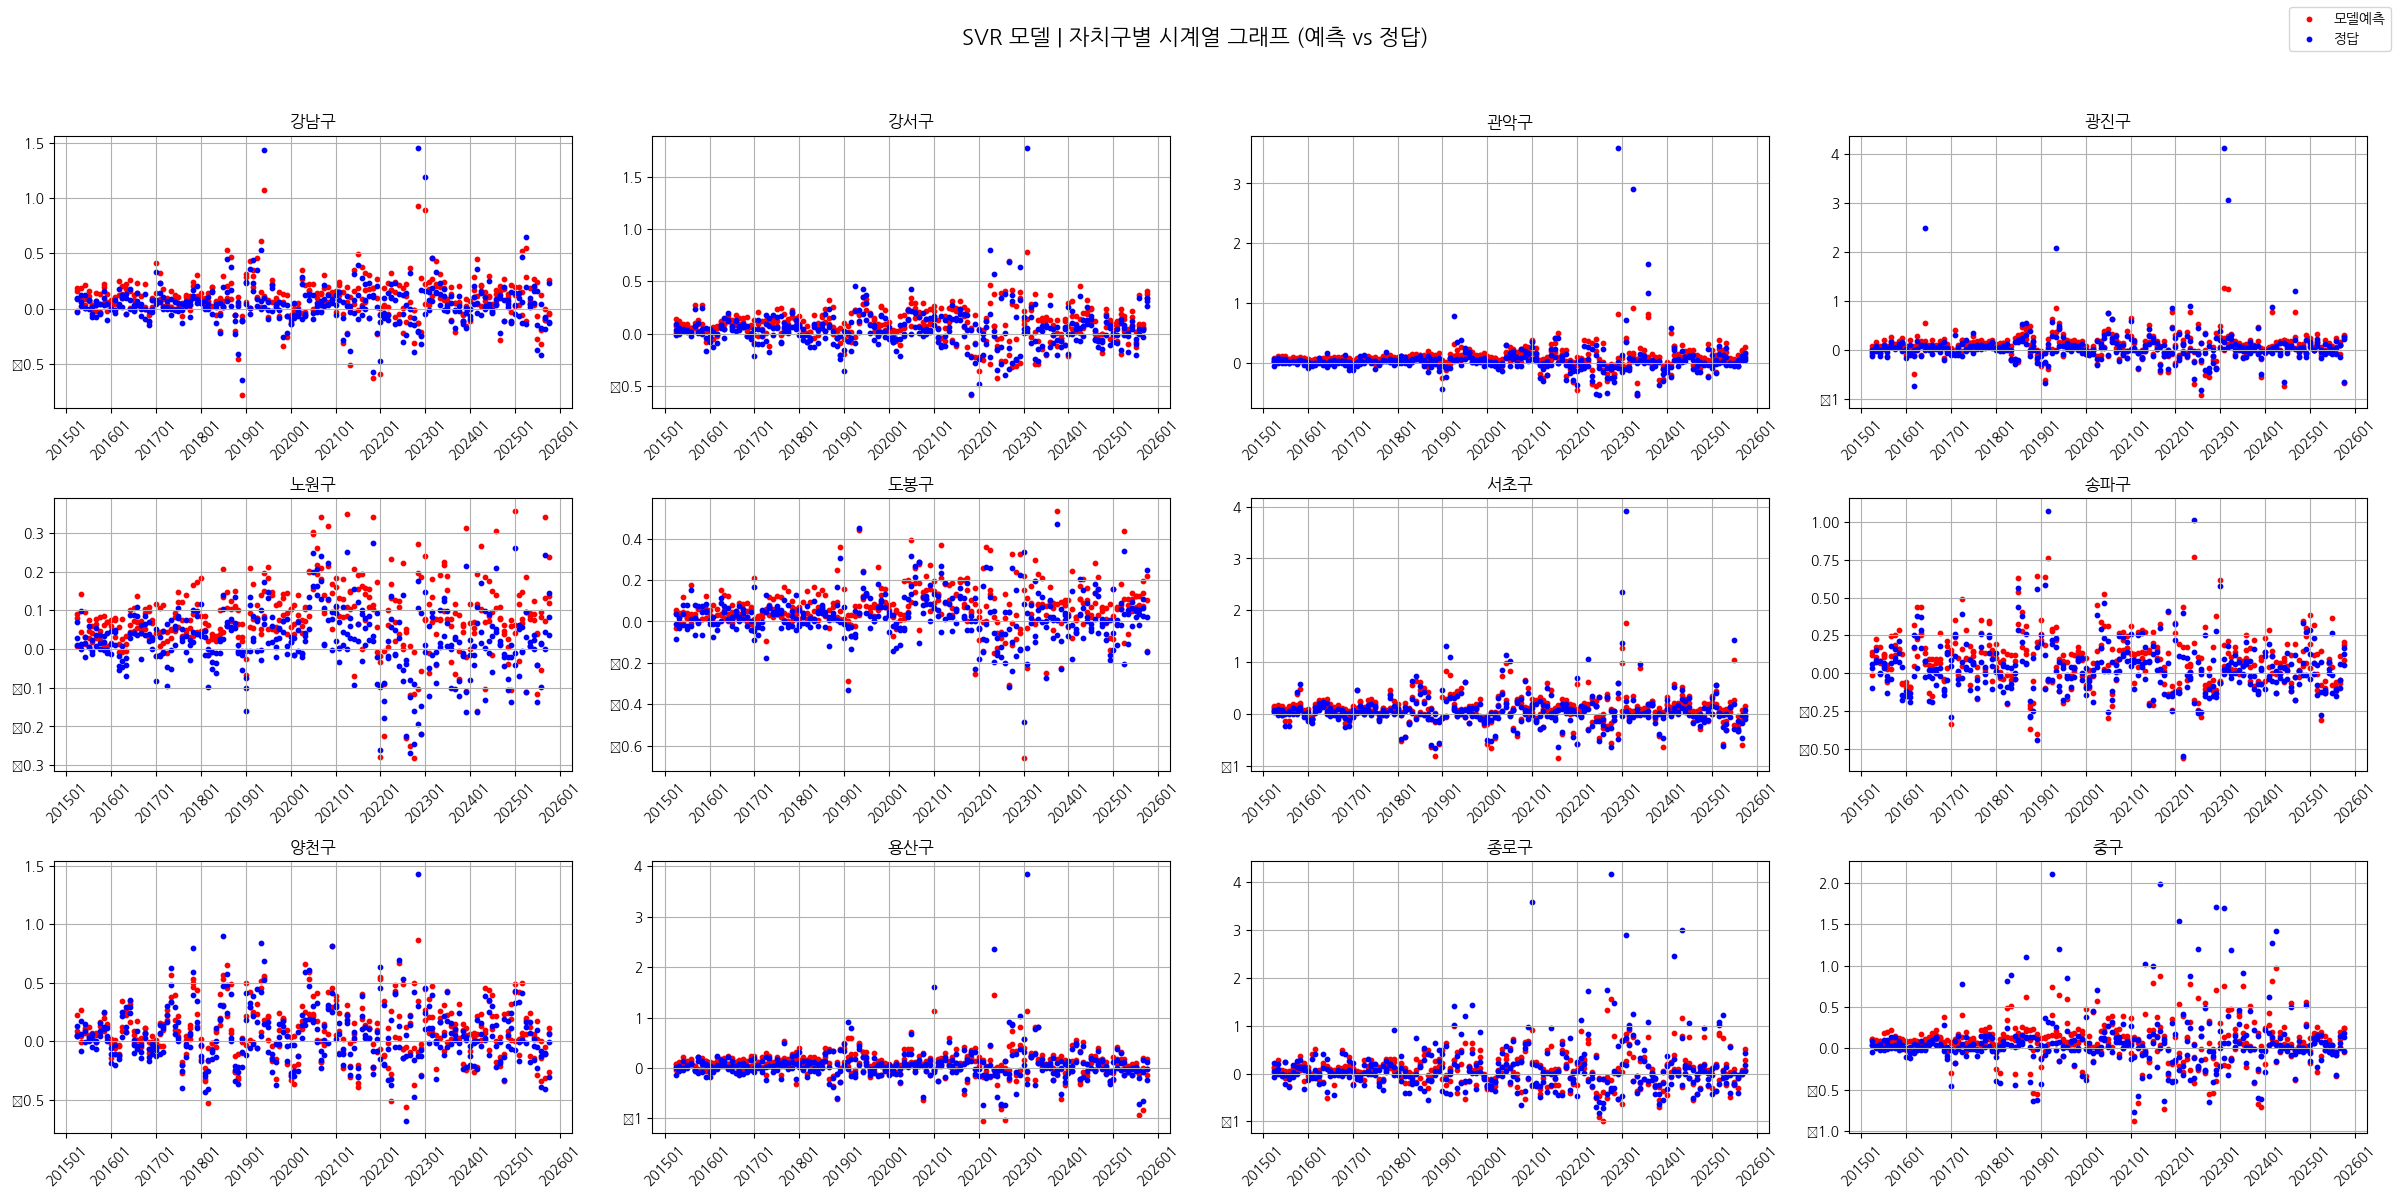

/tmp/ipykernel_73163/1535208249.py:69: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipykernel_73163/1535208249.py:70: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.savefig(
/home/hyuksu/projects/ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


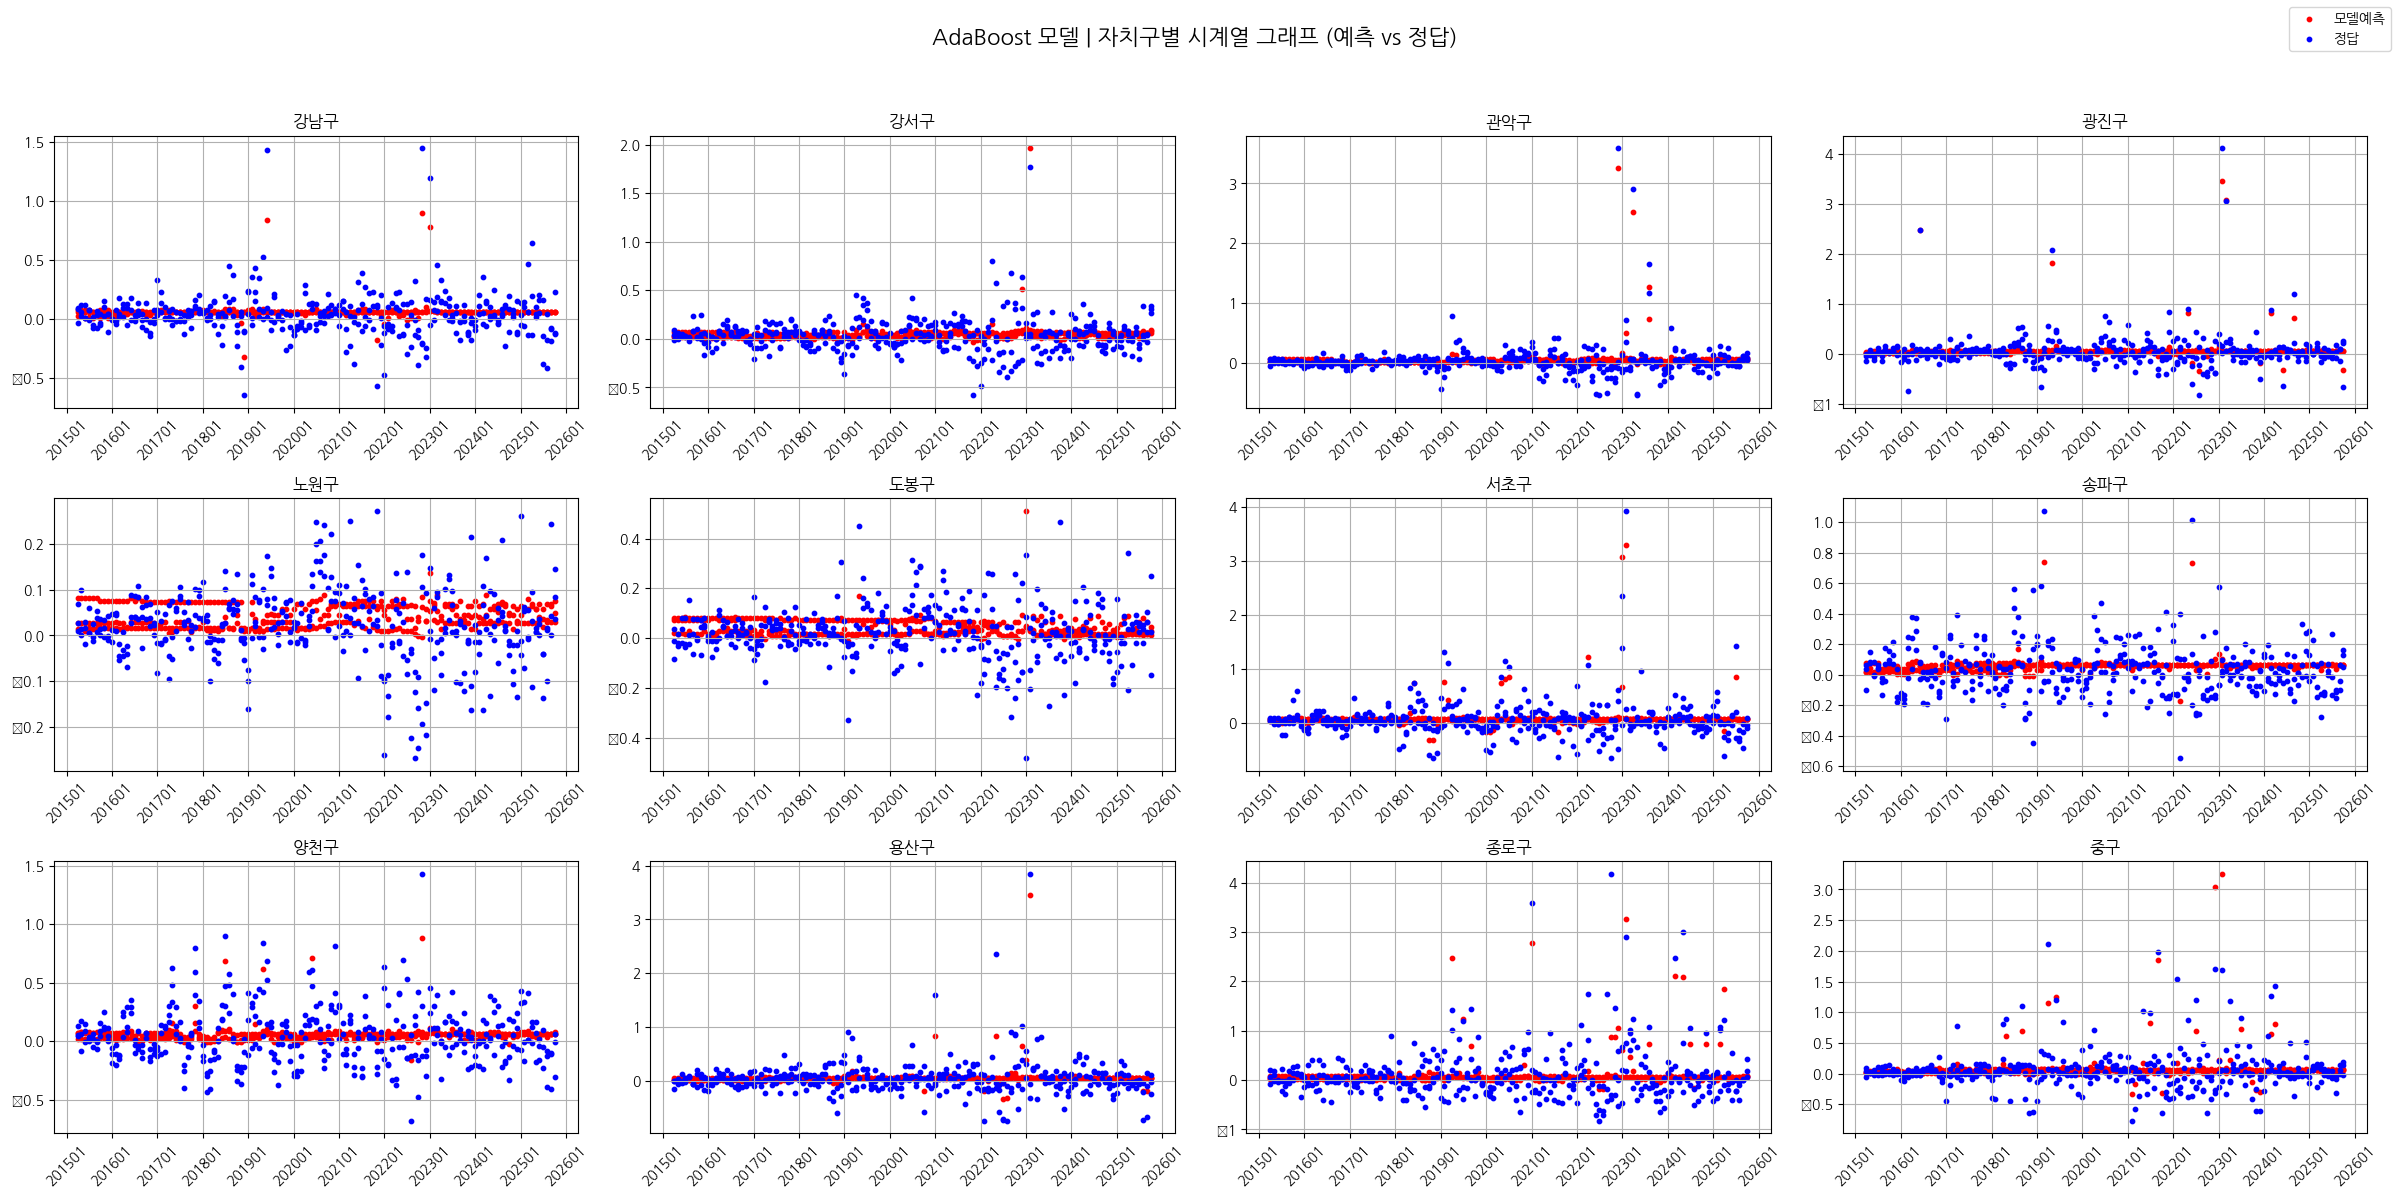

/tmp/ipykernel_73163/1535208249.py:69: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipykernel_73163/1535208249.py:70: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.savefig(
/home/hyuksu/projects/ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


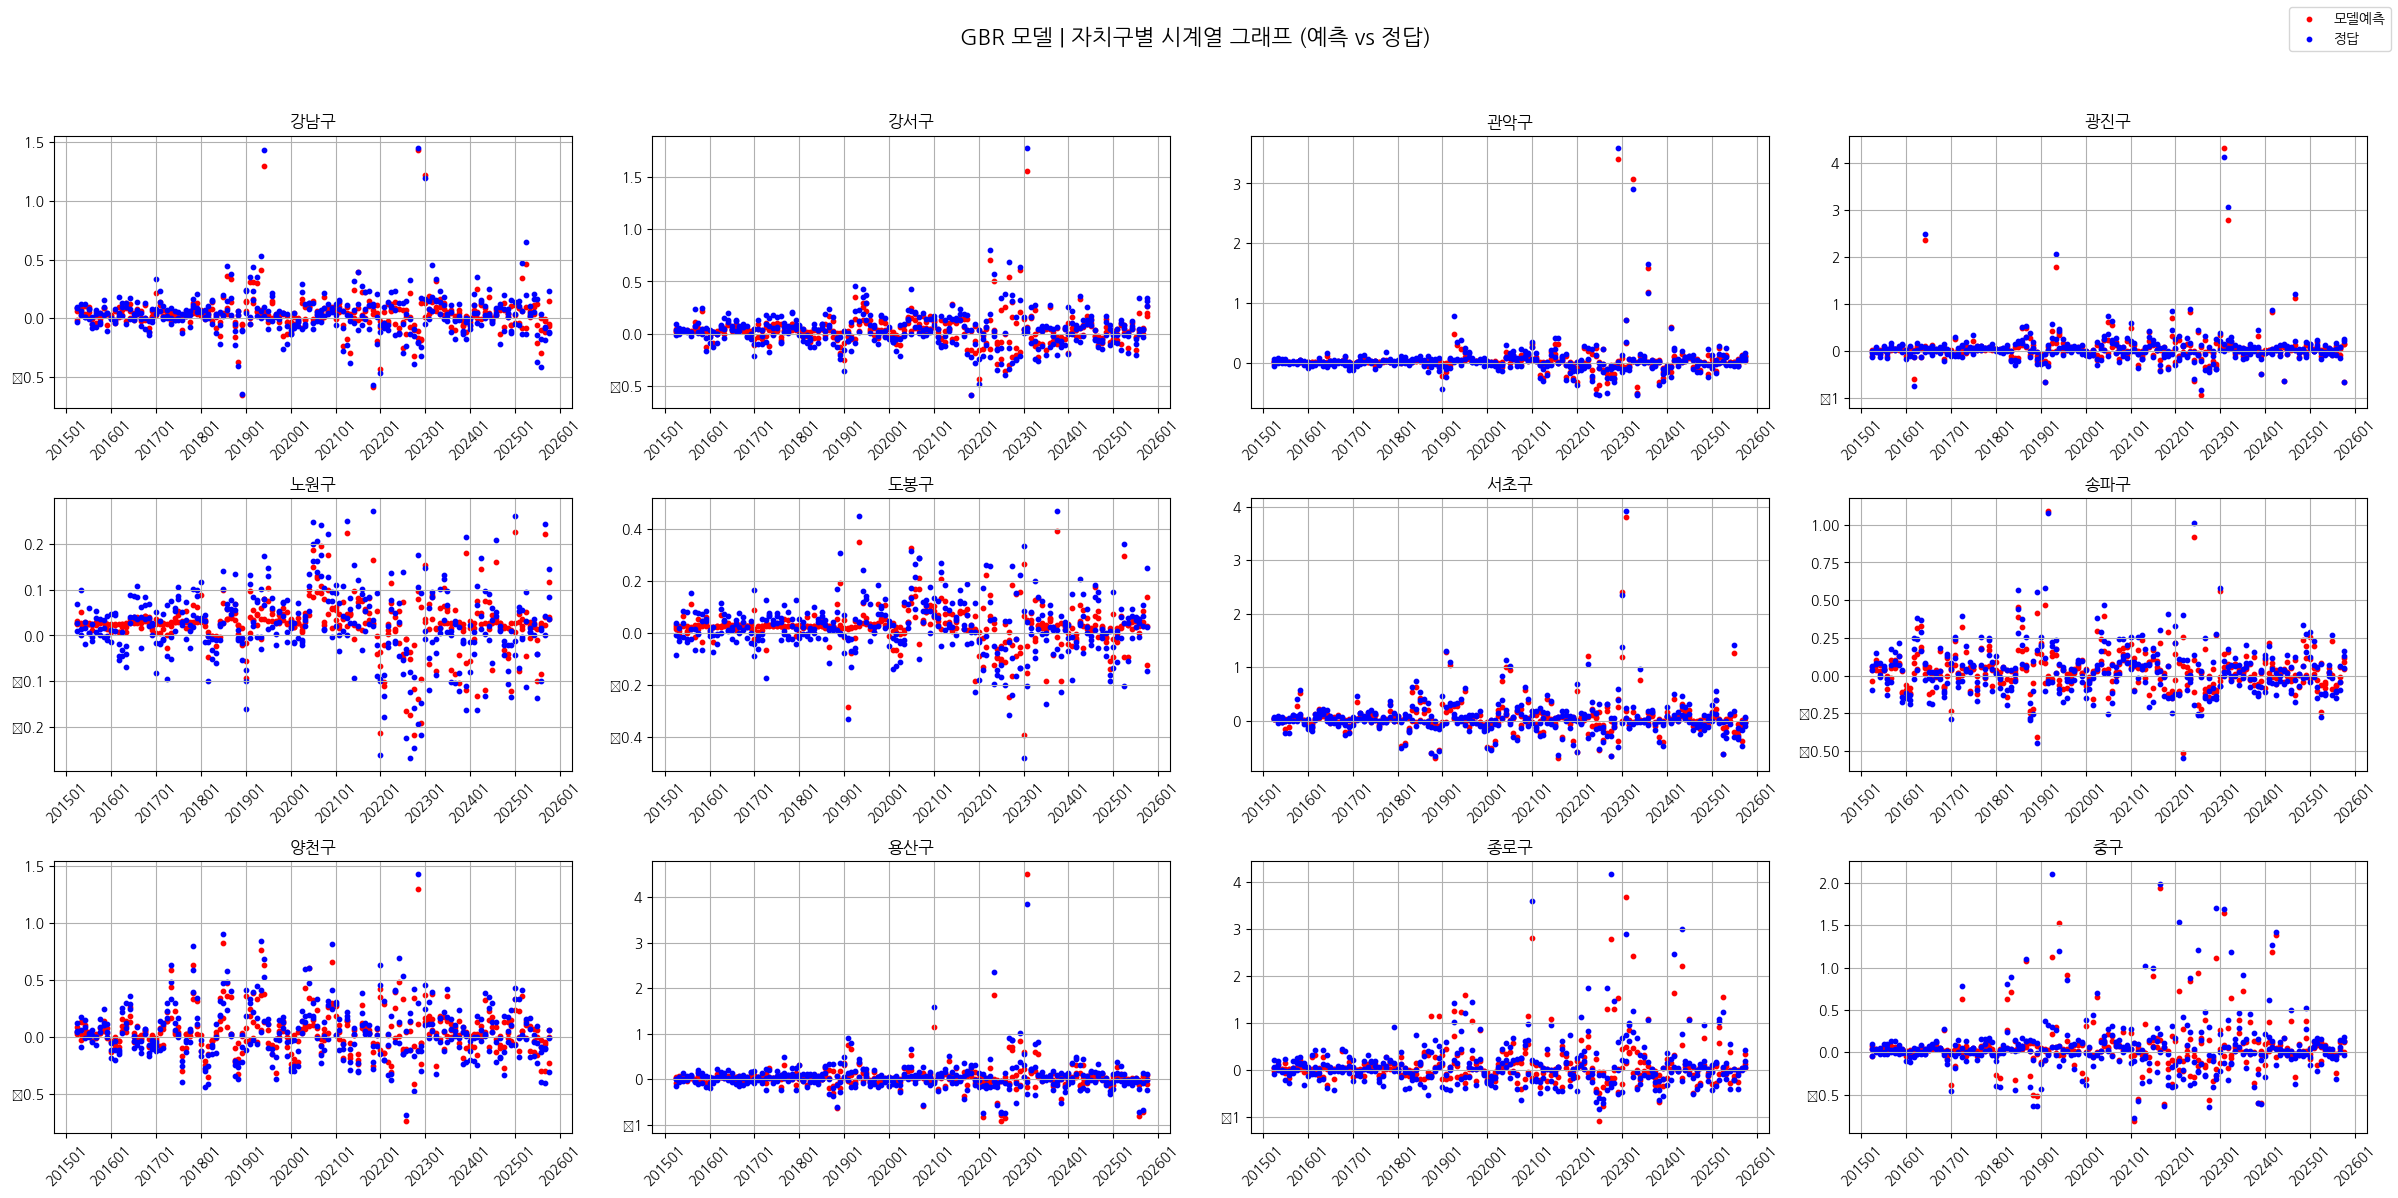

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import pandas as pd
import math
import os

os.makedirs("figures", exist_ok=True)

# 비교할 모델들 (이름: 파이프라인)
models = {
    "Lasso": lasso,
    "Ridge": ridge,
    "SVR": svr,
    "AdaBoost": ada,
    "GBR": gbr
}

states = sorted(read['STATES'].dropna().unique())
n = len(states)

cols = 4
rows = math.ceil(n / cols)

for model_name, model in models.items():

    fig, axes = plt.subplots(rows, cols, figsize=(24, 12))
    axes = axes.flatten()

    for i, s in enumerate(states):
        ax = axes[i]

        con = read['STATES'] == s
        data = read.loc[con].copy()

        data['DATE_YM'] = pd.to_datetime(
            data['DATE_YM'].astype(str),
            format='%Y%m',
            errors='coerce'
        )

        y_true = data['VARIABLED']
        x_data = data.drop(columns=['VARIABLED', 'DATE_YM'])

        # 🔥 모델만 바뀜
        pre = model.predict(x_data)

        ax.scatter(data['DATE_YM'], pre, color='red', s=10, label='모델예측')
        ax.scatter(data['DATE_YM'], y_true, color='blue', s=10, label='정답')
        ax.set_title(s)
        ax.grid(True)

        ax.xaxis.set_major_locator(mdate.YearLocator())
        ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y%m'))
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)

    # 남는 subplot 제거
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # 범례 한 번만
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')

    fig.suptitle(
        f'{model_name} 모델 | 자치구별 시계열 그래프 (예측 vs 정답)',
        fontsize=16
    )
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    fig.savefig(
        f"figures/{model_name}_all_states_4x3.png",
        dpi=300,
        bbox_inches="tight"
    )

   

    plt.show()
